# Sentiment Analysis

Extract sentiment from a text. Usu. in terms of polarity: 
 - positive polarity: good sentiment: approval
 - negative polarity: bad sentiment: disapproval

Works well for reviews. Not so much for literature. 

Several libraries for sentiment analysis: 

 - lexical: uses a dictionary (fabulous! +2, terrible! -2) 
   - "not terrible!" <- -2, not 0? 0.5? 
   - Negation propagation

 - machine-learning approaches
   - performs slightly better than lexical approach
   
VADER: lexical, negation propagation
 - "a bomb" <- bad
 - "the bomb" <- good

TextBlob: an NLTK Lite that has sentiment analysis built in

In [50]:
from nltk.sentiment import SentimentIntensityAnalyzer, SentimentAnalyzer
import nltk
import pandas as pd

In [10]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jon/nltk_data...


True

In [11]:
sentimentAnalyzer = SentimentIntensityAnalyzer()

In [13]:
sentimentAnalyzer.polarity_scores('That was really really terrible and I hated it!')['compound']

-0.8565

In [14]:
def getSentiment(text): 
    return sentimentAnalyzer.polarity_scores(text)['compound']

In [15]:
dubliners = open('../Readings/content/texts/dubliners.md').read()

In [16]:
dublinersStories = dubliners.split('\n## ')

In [18]:
[text[:200] for text in dublinersStories][4]

'EVELINE\n\nSHE sat at the window watching the evening invade the avenue. Her head\nwas leaned against the window curtains and in her nostrils was the odour\nof dusty cretonne. She was tired.\n\nFew people p'

In [19]:
eveline = dublinersStories[4]

In [29]:
evelineParas = eveline.split('\n\n')

In [23]:
len(evelineParas)

27

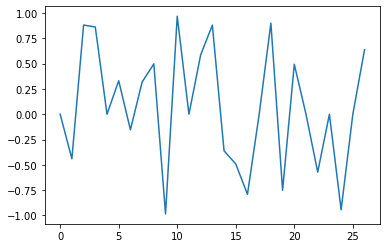

In [28]:
pd.Series([getSentiment(para) for para in evelineParas]).plot()

In [30]:
evelineSents = nltk.sent_tokenize(eveline)

In [34]:
evelineSentiments = pd.Series([getSentiment(sent) for sent in evelineSents])

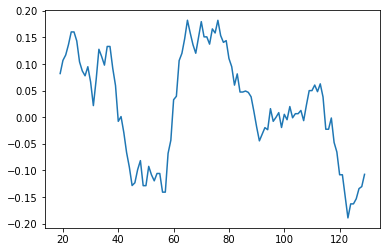

In [41]:
evelineSentiments.rolling(20).mean().plot()

In [49]:
for sentiment, sentence in zip(evelineSentiments[120:], evelineSents[120:]): 
    print(sentiment, sentence.replace('\n', ' '))

-0.3595 No!
0.0 It was impossible.
-0.3182 Her hands clutched the iron in frenzy.
-0.807 Amid the seas she sent a cry of anguish!
0.0 "Eveline!
0.0 Evvy!"
-0.128 He rushed beyond the barrier and called to her to follow.
0.0 He was shouted at to go on but he still called to her.
0.0772 She set her white face to him, passive, like a helpless animal.
0.4588 Her eyes gave him no sign of love or farewell or recognition.


# Macro-Etymological Analysis

```
kingly - royal - regal 
 ^
 - Germanic        ^
 
           ^       - Latin 
           - French 
```

Medical terms from French or Latin. 

In [1]:
%cd macro-etym

/home/jon/Code/course-computational-literary-analysis/Notes/macro-etym


In [2]:
import macroetym

In [5]:
macroetym.Text()

AttributeError: module 'macroetym' has no attribute 'Text'